In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Dataset Loading and EDA

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

unique, counts = np.unique(y_train, return_counts=True)
print(f"Train labels: {dict(zip(unique, counts))}")

unique, counts = np.unique(y_test, return_counts=True)
print(f"Test labels: {dict(zip(unique, counts))}")

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


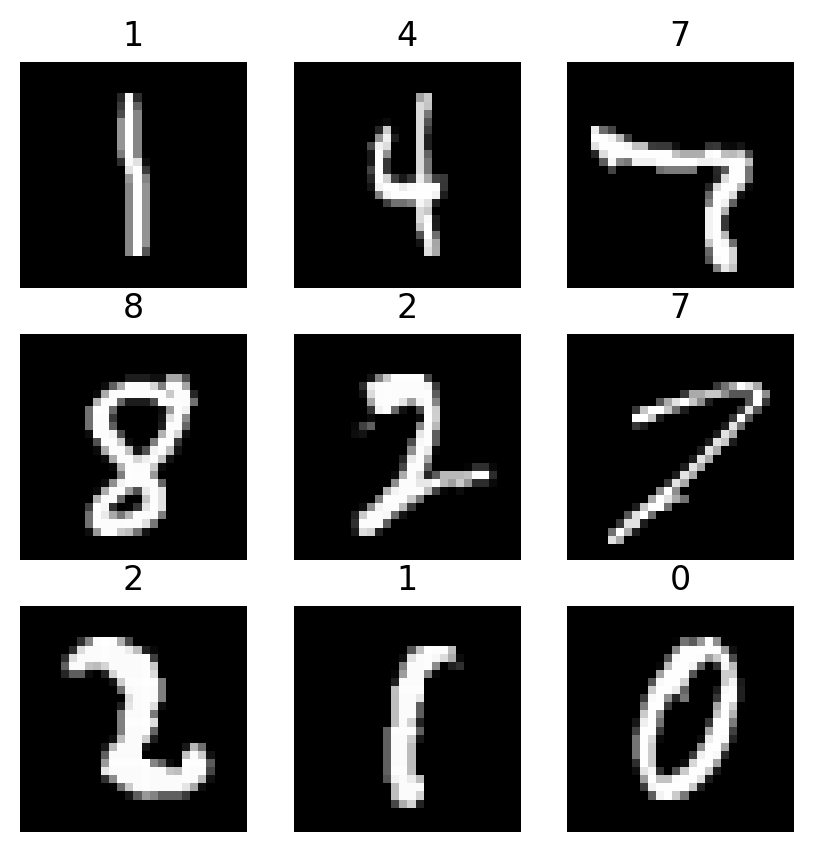

In [4]:
indexes = np.random.randint(0, x_train.shape[0], size=9)
images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5, 5))
for i in range(len(indexes)):
    plt.subplot(3, 3, i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(labels[i])
plt.show()

## Preprecessing

In [5]:
from keras.layers import Activation, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [6]:
num_labels = len(np.unique(y_train))

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

x_train = np.reshape(x_train, [-1, x_train.shape[1], x_train.shape[2], 1])
x_test = np.reshape(x_test, [-1, x_test.shape[1], x_test.shape[2], 1])
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

input_shape = (x_train.shape[1], x_train.shape[2], 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

## Modeling
- Build-up Functional API Model

In [7]:
def create_func_model():
    inputs = keras.Input(shape = input_shape)
    conv1 = Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu'
              )(inputs)
    maxpool1 = MaxPooling2D(pool_size=pool_size)(conv1)
    conv2 = Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu'
              )(maxpool1)
    maxpool2 = MaxPooling2D(pool_size=pool_size)(conv2)
    conv3 = Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu'
              )(maxpool2)
    flatten1 = Flatten()(conv3)
    drop1 = Dropout(dropout)(flatten1)
    outputs = Dense(num_labels, 
              activation='softmax'
             )(drop1)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

func_model = create_func_model()
func_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928 

2023-06-13 17:37:25.183057: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-06-13 17:37:25.183099: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-06-13 17:37:25.183107: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-06-13 17:37:25.183163: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-13 17:37:25.183201: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


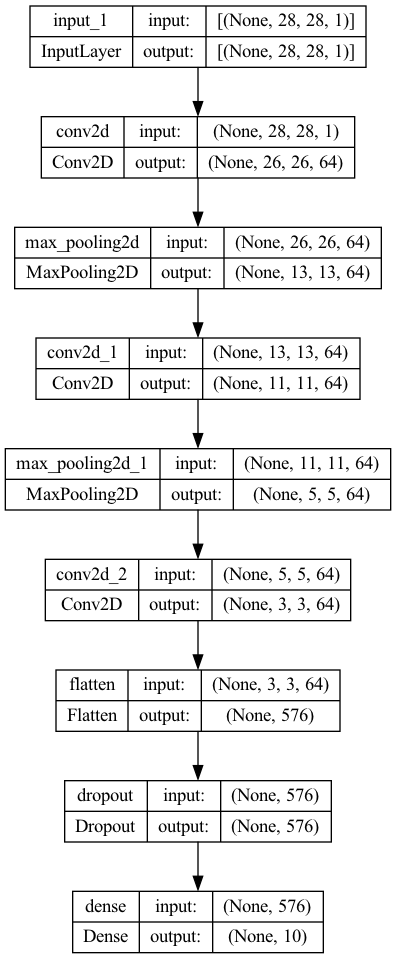

In [8]:
keras.utils.plot_model(model=func_model,
                       to_file='MNIST_CNN.png',
                       show_shapes=True
                      )

In [9]:
learning_rate = 0.001
func_model.compile(loss='categorical_crossentropy',
                   optimizer=keras.optimizers.Adam(learning_rate),
                   metrics=['accuracy']
                  )

In [10]:
history = func_model.fit(x_train, y_train,
                         epochs=10,
                         batch_size=batch_size,
                         validation_data=(x_test, y_test)
                        )

Epoch 1/10
  1/469 [..............................] - ETA: 2:18 - loss: 2.3093 - accuracy: 0.1250

2023-06-13 17:37:50.505729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.2611 - accuracy: 0.9204

2023-06-13 17:37:58.337192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 9s 18ms/step - loss: 0.2611 - accuracy: 0.9204 - val_loss: 0.0588 - val_accuracy: 0.9817
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0657 - accuracy: 0.9796 - val_loss: 0.0375 - val_accuracy: 0.9882
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0458 - accuracy: 0.9860 - val_loss: 0.0308 - val_accuracy: 0.9906
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0310 - val_accuracy: 0.9899
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.0240 - val_accuracy: 0.9926
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0279 - accuracy: 0.9908 - val_loss: 0.0274 - val_accuracy: 0.9911
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0218 - accuracy: 0.9932 - val_loss: 0.0318 - val_accuracy: 0.9891
Epoch 8/10

In [11]:
loss, acc = func_model.evaluate(x_test, y_test, batch_size=batch_size)
print(f"Test accuracy: {(100*acc):>.1f}%")

79/79 [==============================] - 1s 7ms/step - loss: 0.0243 - accuracy: 0.9925
Test accuracy: 99.3%


## Visualization

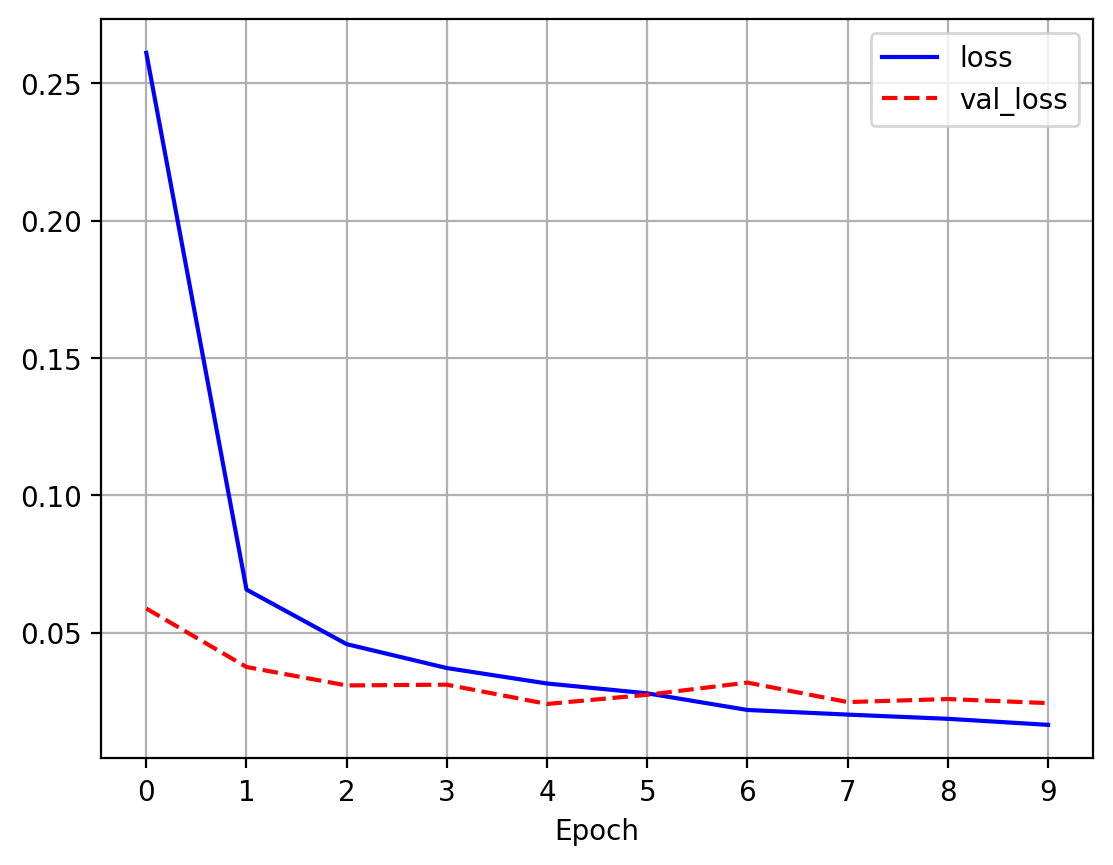

In [14]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.xticks(range(10))
plt.grid()
plt.legend()
plt.show()

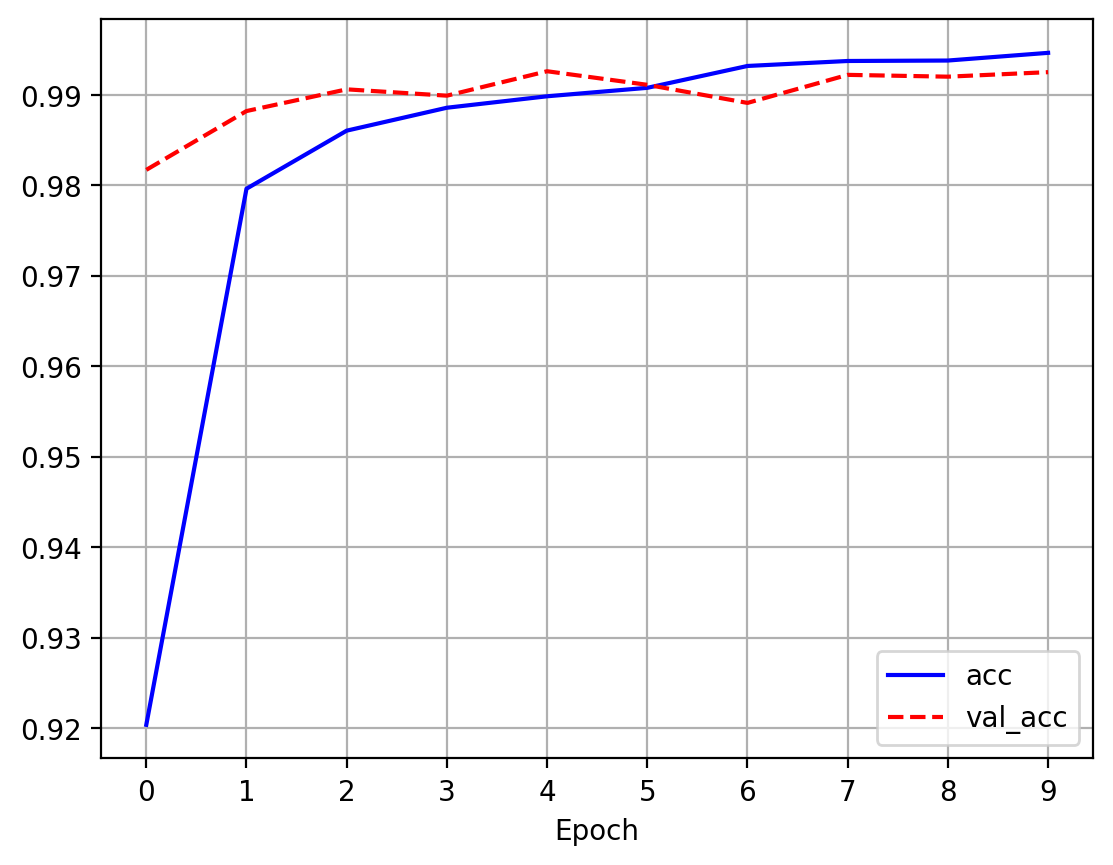

In [15]:
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'r--', label='val_acc')
plt.xlabel('Epoch')
plt.xticks(range(10))
plt.grid()
plt.legend()
plt.show()

## Tensorboard

In [16]:
%load_ext tensorboard

In [17]:
new_model_1 = create_func_model()
new_model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                    loss='categorical_crossentropy',
                    metrics=['accuracy']
                   )

In [18]:
new_model_1.evaluate(x_test, y_test)

 20/313 [>.............................] - ETA: 1s - loss: 2.3004 - accuracy: 0.0547

2023-06-13 17:39:24.488681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 2.3004 - accuracy: 0.0595


[2.3003509044647217, 0.05950000137090683]

In [19]:
log_dir = './log/MNIST_CNN'
tensorboard_cb = keras.callbacks.TensorBoard(log_dir, histogram_freq=1)
# histogram_freq=1: save per 1 epoch; Distribution about the weight and bias

In [20]:
new_model_1.fit(x_train, y_train,
                epochs=10,
                batch_size=batch_size,
                validation_data=(x_test, y_test),
                callbacks=[tensorboard_cb]
               )

Epoch 1/10
  5/469 [..............................] - ETA: 7s - loss: 2.2556 - accuracy: 0.1750  

2023-06-13 17:39:38.142790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 8s 17ms/step - loss: 0.2572 - accuracy: 0.9215 - val_loss: 0.0557 - val_accuracy: 0.9834
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0654 - accuracy: 0.9798 - val_loss: 0.0376 - val_accuracy: 0.9891
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0468 - accuracy: 0.9853 - val_loss: 0.0282 - val_accuracy: 0.9909
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0373 - accuracy: 0.9884 - val_loss: 0.0325 - val_accuracy: 0.9897
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.0268 - val_accuracy: 0.9914
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0271 - accuracy: 0.9918 - val_loss: 0.0263 - val_accuracy: 0.9914
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0229 - val_accuracy: 0.9925
Epoch 8/10

In [21]:
%tensorboard --logdir $log_dir

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
W0613 17:40:59.004606 6232076288 plugin_event_accumulator.py:369] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

## Save and Load

In [22]:
func_model.save_weights('./save/func_model.skpt')

In [23]:
func_model.save('./save/func_model')

INFO:tensorflow:Assets written to: ./save/func_model/assets


INFO:tensorflow:Assets written to: ./save/func_model/assets


In [24]:
func_model_2 = keras.models.load_model('./save/func_model')

In [25]:
func_model_2.evaluate(x_test, y_test)

 30/313 [=>............................] - ETA: 1s - loss: 0.0300 - accuracy: 0.9875 

2023-06-13 17:41:00.527017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.0243 - accuracy: 0.9925


[0.024327754974365234, 0.9925000071525574]